In [2]:

import pandas as pd

# Load the CSV files containing predictions from each meta-learner
slearner_data = pd.read_csv('../results/s_predictions.csv')
tlearner_data = pd.read_csv('../results/t_predictions.csv')
xlearner_data = pd.read_csv('../results/x_predictions.csv')
rlearner_data = pd.read_csv('../results/r_predictions.csv')

# Add a learner identifier column
slearner_data['Learner'] = 'S-Learner'
tlearner_data['Learner'] = 'T-Learner'
xlearner_data['Learner'] = 'X-Learner'
rlearner_data['Learner'] = 'R-Learner'

# Combine all data into one DataFrame
combined_data = pd.concat([slearner_data, tlearner_data, xlearner_data, rlearner_data], ignore_index=True)
combined_data.head()

,schoolid,GrowthMindsetIntervention,StudentAchievementScore,FutureSuccessExpectations,StudentRaceEthnicity,StudentGender,FirstGenCollegeStatus,SchoolUrbanicity,PreInterventionFixedMindset,SchoolAchievementLevel,SchoolMinorityComposition,PovertyConcentration,TotalStudentPopulation,CATE,Learner
0,76,1,0.081602,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.242115,S-Learner
1,76,1,-0.385869,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.180260,S-Learner
2,76,1,0.398184,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.242115,S-Learner
3,76,1,-0.175037,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.242115,S-Learner
4,76,1,0.884583,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.223880,S-Learner


In [3]:
# List of features to calculate CATE for
features = [
    'GrowthMindsetIntervention', 'FutureSuccessExpectations',
    'StudentRaceEthnicity', 'StudentGender', 'FirstGenCollegeStatus', 'SchoolUrbanicity',
    'PreInterventionFixedMindset', 'SchoolAchievementLevel', 'SchoolMinorityComposition',
    'PovertyConcentration', 'TotalStudentPopulation'
]

# Function to calculate CATE for a given feature
def calculate_cate(feature):
    grouped_data = combined_data.groupby(['Learner', feature]).agg({'CATE': 'mean'}).reset_index()
    grouped_data.columns = ['Learner', feature, 'CATE']
    return grouped_data

# Calculate CATE for each feature and store the results
cate_results = {}
for feature in features:
    cate_results[feature] = calculate_cate(feature)

# Calculate the actual School Achievement Scores
actual_scores = {feature: combined_data.groupby(feature)['StudentAchievementScore'].mean() for feature in features}

# Create a comparison matrix for CATE and actual scores
comparison_matrix = pd.DataFrame(index=features, columns=['S-Learner', 'T-Learner', 'R-Learner', 'X-Learner', 'StudentAchievementScore'])

# Fill the matrix with CATE values and actual scores
for feature in features:
    for learner in ['S-Learner', 'T-Learner', 'R-Learner', 'X-Learner']:
        learner_data = cate_results[feature]
        mean_cate = learner_data[learner_data['Learner'] == learner]['CATE'].mean()
        comparison_matrix.loc[feature, learner] = mean_cate
    comparison_matrix.loc[feature, 'StudentAchievementScore'] = actual_scores[feature].iloc[0]

# Display the comparison matrix
comparison_matrix



,S-Learner,T-Learner,R-Learner,X-Learner,StudentAchievementScore
GrowthMindsetIntervention,0.244798,0.279892,0.46901,0.253454,-0.195639
FutureSuccessExpectations,0.243297,0.252234,0.666306,0.212314,-0.525624
StudentRaceEthnicity,0.240382,0.278262,0.440988,0.248819,-0.062681
StudentGender,0.243489,0.279347,0.483333,0.251988,0.003672
FirstGenCollegeStatus,0.246866,0.280338,0.448767,0.255865,0.012984
SchoolUrbanicity,0.240176,0.278914,0.501182,0.251655,0.027419
PreInterventionFixedMindset,0.230647,0.278851,0.502452,0.240691,0.506298
SchoolAchievementLevel,0.230647,0.278851,0.502452,0.240691,-0.080293
SchoolMinorityComposition,0.230647,0.278851,0.502452,0.240691,-0.341006
PovertyConcentration,0.230647,0.278851,0.502452,0.240691,-0.352945


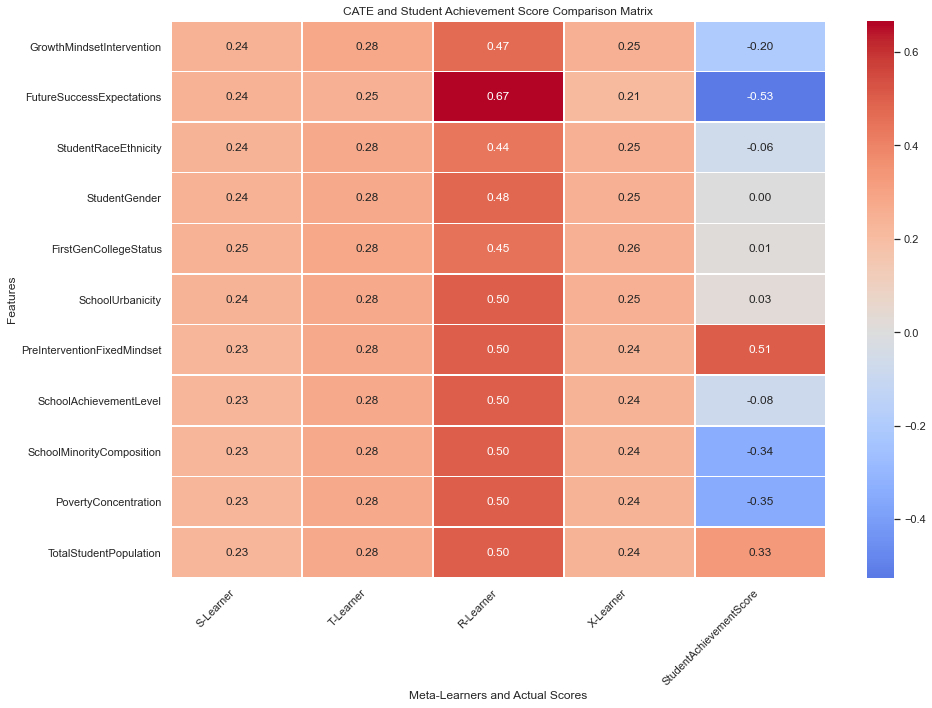

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))

# Heatmap with diverging color palette for better differentiation
sns.heatmap(comparison_matrix.astype(float), annot=True, cmap="coolwarm", center=0, cbar=True, fmt=".2f", linewidths=.5)

plt.title('CATE and Student Achievement Score Comparison Matrix')
plt.xlabel('Meta-Learners and Actual Scores')
plt.ylabel('Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save the figure for better clarity
plt.savefig("CATE_Comparison_Matrix.png", dpi=300)
plt.show()


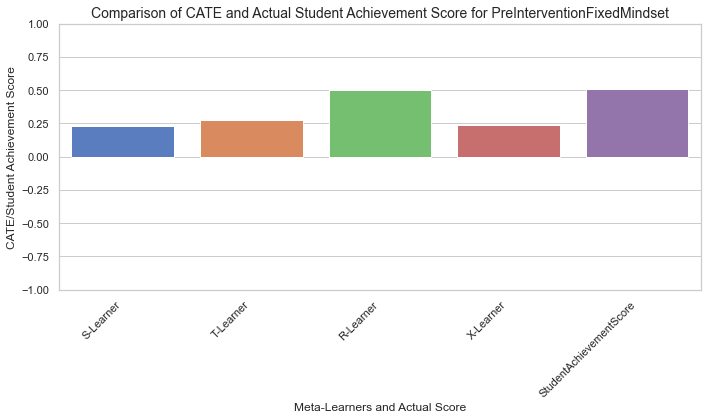

<Figure size 432x288 with 0 Axes>

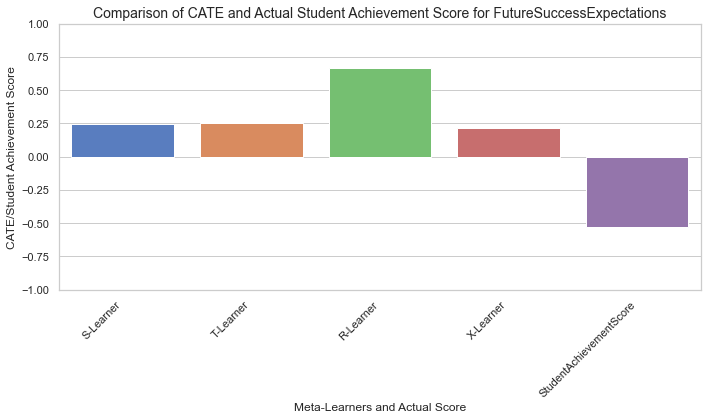

<Figure size 432x288 with 0 Axes>

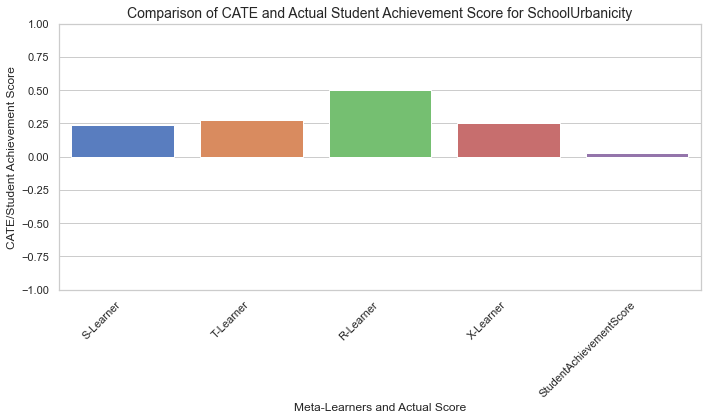

<Figure size 432x288 with 0 Axes>

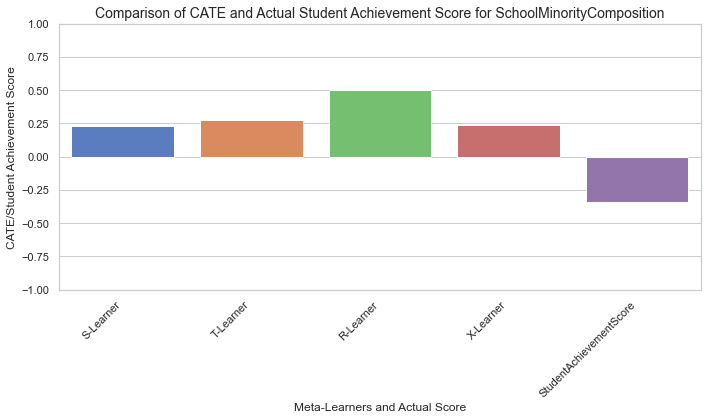

<Figure size 432x288 with 0 Axes>

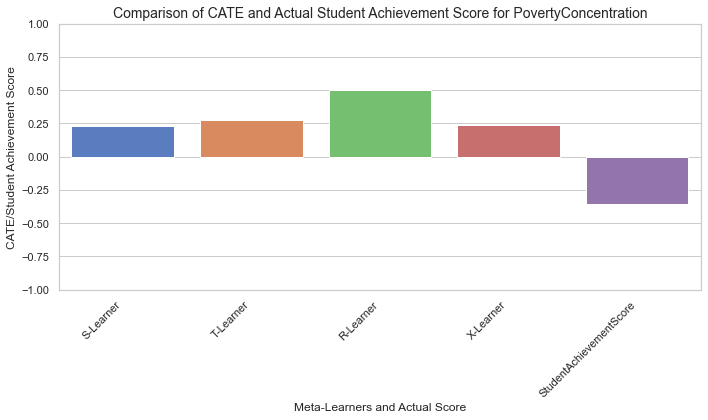

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style for better aesthetics
sns.set(style="whitegrid")
# Define the list of highly contributing features
highly_contributing_features = [
    'PreInterventionFixedMindset',
    'FutureSuccessExpectations',
    'SchoolUrbanicity',
    'SchoolMinorityComposition',
    'PovertyConcentration'
]
# Loop through each highly contributing feature and create a bar plot
for feature in highly_contributing_features:
    plt.figure(figsize=(10, 6))

    # Create a DataFrame for the feature to plot
    feature_data = comparison_matrix.loc[feature].reset_index()
    feature_data.columns = ['Learner', 'CATE/StudentAchievementScore']

    # Plot the barplot
    sns.barplot(data=feature_data, x='Learner', y='CATE/StudentAchievementScore', palette='muted')

    plt.title(f'Comparison of CATE and Actual Student Achievement Score for {feature}', fontsize=14)
    plt.xlabel('Meta-Learners and Actual Score', fontsize=12)
    plt.ylabel('CATE/Student Achievement Score', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(-1, 1)  # Adjust the limits based on your data to ensure all bars are visible
    plt.tight_layout()

    # Save the plot
    plt.show()
    plt.savefig(f"{feature}_CATE_Comparison.png", dpi=300)


